In [258]:
from find_intencity_sf import find_intencity_sf
from load_structures import load_structures
from read_spectrum_curve import Spectrum
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import normalize, PolynomialFeatures
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')

In [3]:
tol = 1e-7
sigma = 20

Structure(s) salicylic_acid have been successfully loaded!


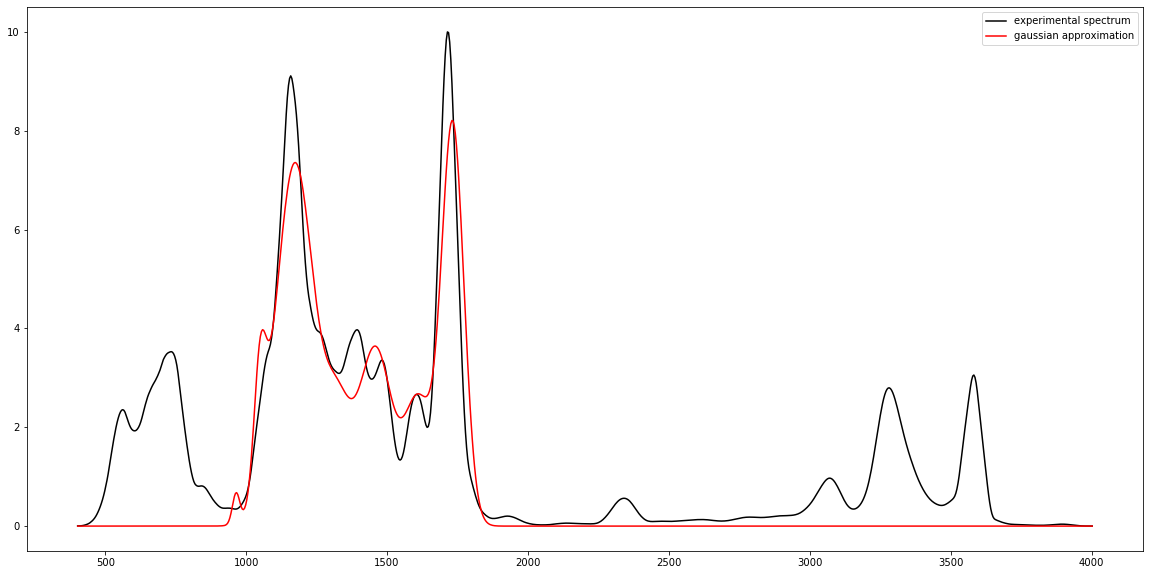

In [309]:
sf, fg = find_intencity_sf('salicylic_acid', tol=1e-14, sigma=20, max_iter=None, bounds=(900, 2000))

In [310]:
sf

,peak_position,intencity,psi,sigma,mu,sf
0,1761.0,423.0,109.692405,46.858929,1732.564688,0.259320
1,1612.0,95.0,40.627955,56.765063,1610.383133,0.427663
3,1453.0,55.0,71.440494,69.036998,1458.507468,1.298918
5,1319.0,191.0,33.856979,55.979911,1324.482525,0.177262
9,1171.0,264.0,169.579569,79.994185,1173.119661,0.642347
13,1045.0,169.0,17.633550,25.353375,1049.442905,0.104341
16,951.0,1.0,2.710238,15.352404,964.083441,2.710238


In [300]:
fg['carboxyl'] = [elem.find('carboxyl') != -1 for elem in fg.functional_group]
fg[fg.carboxyl]

,calc_freq,peak_position,intencity,functional_group,carboxyl
0,3605.271606,3605.0,104.0,carboxyl,True
5,1756.445376,1756.0,355.0,carboxyl,True
10,1339.437765,1339.0,154.0,carboxyl hydrogen,True
15,1101.266556,1101.0,78.0,carbon carboxyl,True


In [301]:
fg['ketone'] = [elem.find('ketone') != -1 for elem in fg.functional_group]
fg[fg.ketone]

,calc_freq,peak_position,intencity,functional_group,carboxyl,ketone


In [302]:
fg['hydroxide'] = [elem.find('hydroxide') != -1 for elem in fg.functional_group]
fg[fg.hydroxide]

,calc_freq,peak_position,intencity,functional_group,carboxyl,ketone,hydroxide


In [303]:
fg.to_csv('fg.csv')
sf.to_csv('sf.csv')

Structure(s) 2_benzoyl_benzoic_acid have been successfully loaded!


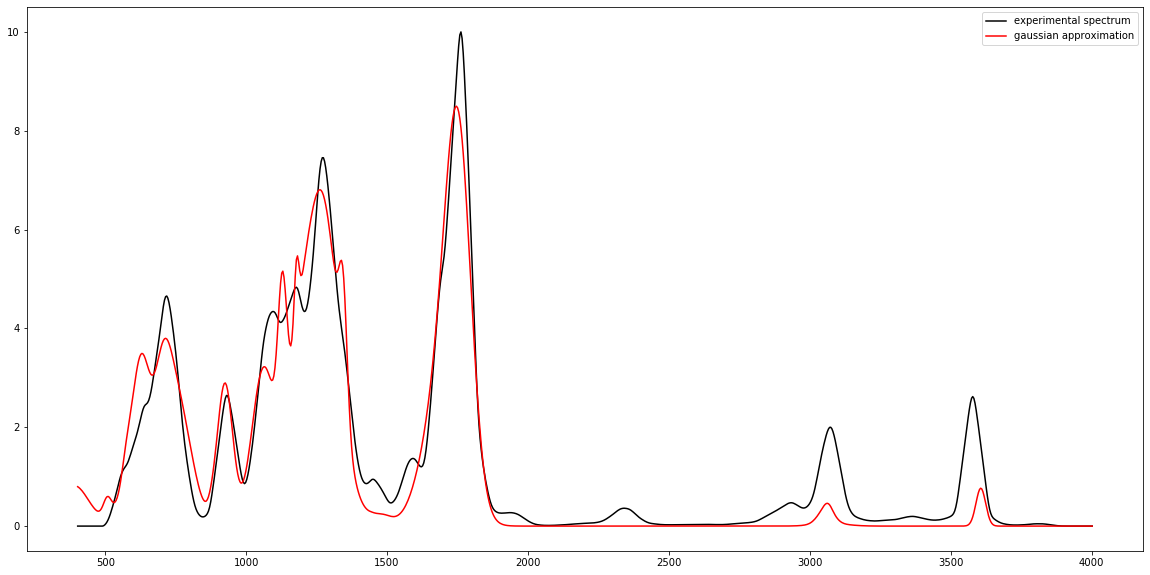

In [36]:
sf, fg = find_intencity_sf('2_benzoyl_benzoic_acid', tol=1e-20, sigma=10, max_iter=None, all_freqs=True)

In [44]:
# sf

In [13]:
struct = load_structures(['2_benzoyl_benzoic_acid'])['2_benzoyl_benzoic_acid']

Structure(s) 2_benzoyl_benzoic_acid have been successfully loaded!


In [20]:
maxes = struct.veda_matrix.drop(['freq'], axis=1).max(axis=1)

In [73]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = struct.veda_matrix.drop(['freq'], axis=1).values
y = sf.sf.values
lr.fit(X[:, :-50], y[:])
X[:, :-50].shape

(75, 25)

In [72]:
prediction = lr.predict(X[:, :-50])
abs(prediction - y) < 0.1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [35]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(lr, X, y, cv=3, scoring='neg_mean_squared_error')
acc

array([-0.13322695, -0.19419734, -0.44506245])

In [22]:
sf

,peak_position,intencity,psi,sigma,mu,sf
0,3607.0,101.0,1.646139,57.228875,3605.820571,0.016298
1,3068.0,57.0,1.803607,71.959229,3069.012564,0.031642
10,1754.0,355.0,7.661663,53.570426,1754.030902,0.021582
11,1701.0,197.0,1.195244,64.192185,1700.408091,0.006067
12,1609.0,35.0,0.057524,20.565555,1608.650064,0.001644
15,1588.0,28.0,1.200229,74.273609,1587.564724,0.042865
16,1487.0,12.0,0.000088,17.408929,1488.396612,0.000007
18,1452.0,17.0,0.335393,25.442976,1453.152927,0.019729
20,1344.0,126.0,2.294808,59.909828,1342.844142,0.018213
24,1253.0,176.0,6.370075,64.779579,1253.918559,0.036194


In [4]:
def generate_column_sum_veda_matrix(structure):
    columns_sum = dict()
    for column in structure.veda_matrix.columns[:-1]:
        coord_name = structure.internal_coordinates[column].coordinates[0].name
        if coord_name not in columns_sum.keys():
            columns_sum[coord_name] = np.zeros((structure.veda_matrix[column].shape[0],))
            columns_sum[coord_name + '_abs'] = np.zeros((structure.veda_matrix[column].shape[0],))

        columns_sum[coord_name] += structure.veda_matrix[column]
        columns_sum[coord_name + '_abs'] += abs(structure.veda_matrix[column])

#     X_name_sum = pd.DataFrame(columns_sum)[np.array(structure.intencities) > 1]
    X_name_sum = pd.DataFrame(columns_sum)
    return X_name_sum

In [92]:
X = generate_column_sum_veda_matrix(struct)
y = sf.sf.values
lr = LinearRegression()
lr.fit(X, y[:])
prediction = lr.predict(X)
abs(prediction - y)

array([4.43317721e-05, 2.06724986e-03, 3.21169688e-03, 5.10051827e-03,
       3.50280712e-03, 3.58552910e-03, 4.57968097e-05, 1.62016496e-02,
       4.07850987e-03, 3.20117698e-03, 4.73009207e-03, 1.92649988e-03,
       1.03203567e-02, 4.28747461e-03, 4.29450986e-03, 3.66176330e-03,
       5.98468737e-03, 5.10268802e-03, 3.80548963e-03, 4.33346293e-03,
       2.49896298e-02, 1.77880677e-02, 2.95829437e-03, 1.93768444e-03,
       4.05079452e-03, 2.57141738e-02, 1.75792663e-03, 2.38471869e-02,
       6.54462268e-03, 8.35709608e-03, 8.55017053e-03, 2.29044176e-03,
       1.22157291e-03, 3.32115846e-04, 1.69770262e-02, 1.31376469e-03,
       2.34962396e-03, 1.44801240e-05, 5.35649765e-03, 7.20689456e-03,
       8.97874119e-03, 7.81019796e-03, 1.82374059e-02, 3.11642303e-03,
       1.57282672e-03, 8.79983929e-03, 4.97916707e-03, 8.76434561e-03,
       2.62834286e-02, 1.46473890e-03, 4.23943221e-03, 6.91439320e-03,
       5.19486153e-03, 2.24841492e-03, 7.33708965e-04, 1.82770270e-03,
      

In [90]:
mse = cross_val_score(lr, X, y, cv=3, scoring='neg_mean_squared_error')
mse

array([-7.21480478e+25, -6.50841145e-04, -3.83977241e-02])

In [94]:
sfs = dict()
sfs['2_benzoyl_benzoic_acid'] = sf[:]

Structure(s) benzoic_acid have been successfully loaded!


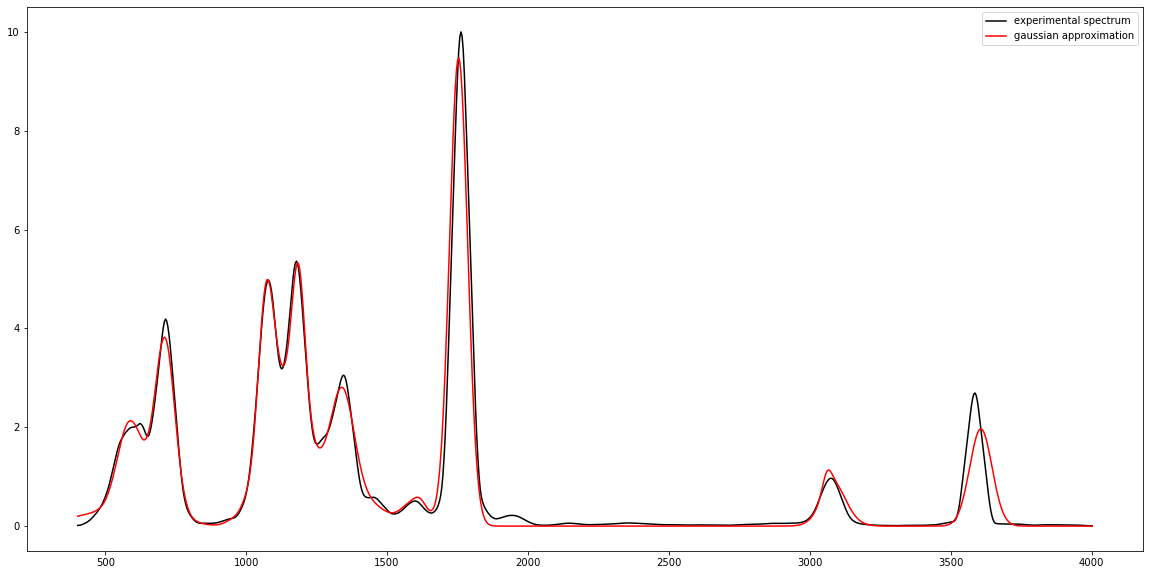

In [95]:
sf, fg = find_intencity_sf('benzoic_acid', tol=1e-20, sigma=10, max_iter=None, all_freqs=True)

In [96]:
sfs['benzoic_acid'] = sf[:]

{'2_benzoyl_benzoic_acid':     peak_position  intencity           psi      sigma           mu            sf
 0     3606.880038   100.9997  2.540729e-01  20.082817  3606.642586  2.515581e-03
 1     3092.478592     2.9031  3.965884e-03  16.997190  3092.482149  1.366086e-03
 2     3082.492910     6.3326  1.403551e-03  18.845057  3081.895422  2.216390e-04
 3     3072.851892    13.2051  5.875478e-02  67.867741  3072.591254  4.449401e-03
 4     3072.114694    11.9713  1.239855e-03  10.200090  3072.628547  1.035689e-04
 5     3064.426772    11.0031  2.899194e-03  18.478321  3064.234213  2.634888e-04
 6     3064.283162    19.0925  3.274163e-02  17.230452  3064.298978  1.714895e-03
 7     3055.618692     8.0978  1.405100e-01  31.427037  3055.368154  1.735163e-02
 8     3052.392254     1.2587  9.216060e-03  32.261461  3052.052791  7.321887e-03
 9     3045.901082     0.1139  3.929786e-05  34.204566  3045.559584  3.450207e-04
 10    1753.538343   355.4577  5.434612e+00  52.951133  1753.683431  1.5

In [100]:
benzoic_acid = load_structures(['benzoic_acid'])['benzoic_acid']
X = generate_column_sum_veda_matrix(benzoic_acid)
y = sfs['benzoic_acid'].sf.values
lr = LinearRegression()
lr.fit(X, y[:])
prediction = lr.predict(X)
abs(prediction - y)

Structure(s) benzoic_acid have been successfully loaded!


array([4.16217407e-02, 1.10106416e+00, 4.80069864e-01, 7.72293090e-01,
       8.83244028e-01, 5.17147583e-01, 1.49179859e-01, 4.22295904e-01,
       6.35855362e-01, 4.88943556e-02, 3.17519615e-03, 2.72242304e-03,
       2.78505699e-01, 5.62283307e-02, 1.78136421e-01, 2.02894296e-01,
       8.68501994e-04, 5.21524475e-01, 4.18612371e-01, 1.13406845e-01,
       5.57614275e-01, 1.66772801e-01, 5.52343269e-02, 1.99755354e-01,
       2.30136564e-01, 1.04285834e-02, 4.16232757e-01, 1.28666787e-03,
       1.99649849e-03, 4.82390783e-02, 2.01720852e-01, 3.03308359e-04,
       5.51164525e-02, 1.74727475e-03, 8.30498913e-02, 5.31214805e-02,
       1.17231099e-01, 2.06215114e-02, 1.05209357e-03])

In [165]:
k_norm = 30.4242
frames = [generate_column_sum_veda_matrix(benzoic_acid), generate_column_sum_veda_matrix(struct)]
X = pd.concat(frames, ignore_index=True)
# X['int'] = benzoic_acid.intencities + [x for x in struct.intencities]
y = pd.concat([sfs['benzoic_acid'].sf, k_norm * sfs['2_benzoyl_benzoic_acid'].sf], ignore_index=True)
lr = LinearRegression()
lr.fit(X, y)
prediction = lr.predict(X)
sum(abs(prediction - y) < 0.1) / len(prediction)
# benzoic_acid.intencities + [x for x in struct.intencities]

0.23684210526315788

In [166]:
sum(abs([y.mean()] * len(y) - y) < 0.1) / len(y)

0.10526315789473684

Structure(s) 3_hydroxy_benzoic_acid have been successfully loaded!
Structure(s) 3_hydroxy_benzoic_acid have been successfully loaded!


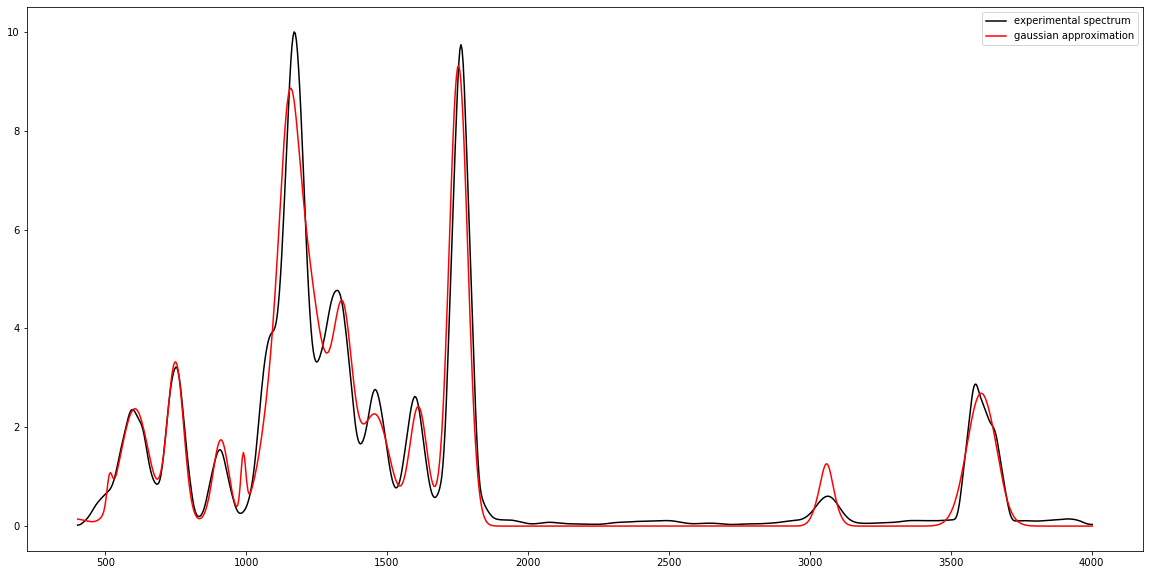

Structure(s) quinone have been successfully loaded!
Structure(s) quinone have been successfully loaded!


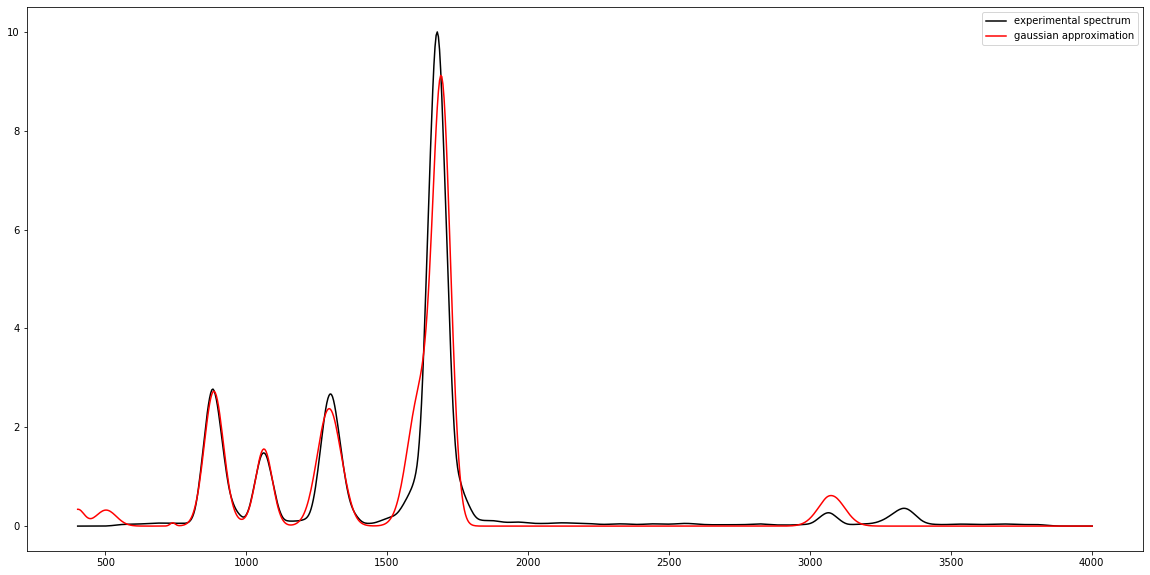

Structure(s) benzil have been successfully loaded!
Structure(s) benzil have been successfully loaded!


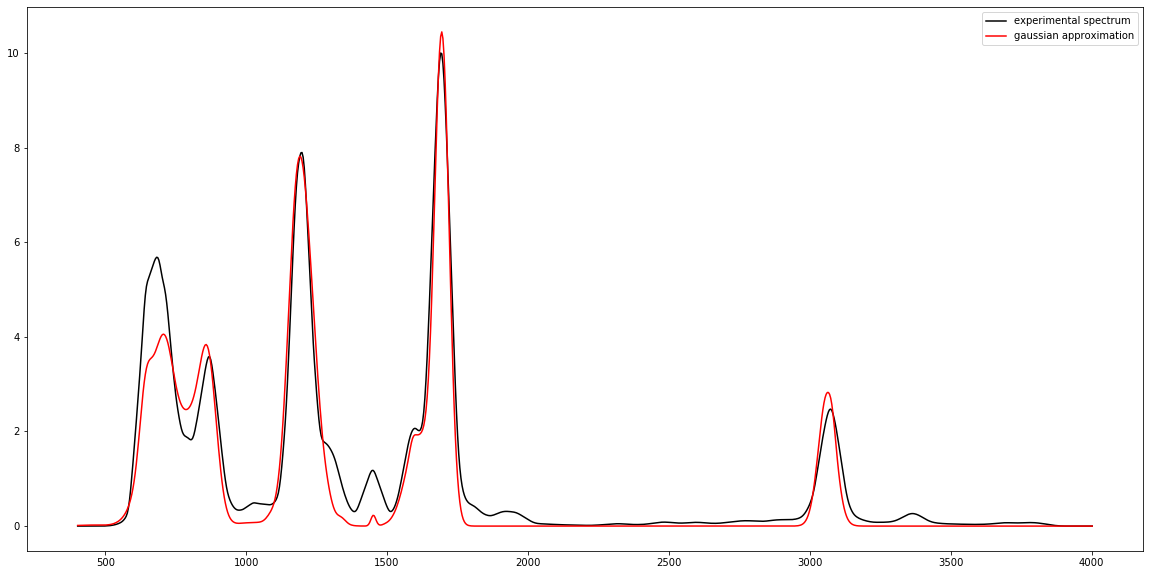

Structure(s) benzoic_acid have been successfully loaded!
Structure(s) benzoic_acid have been successfully loaded!


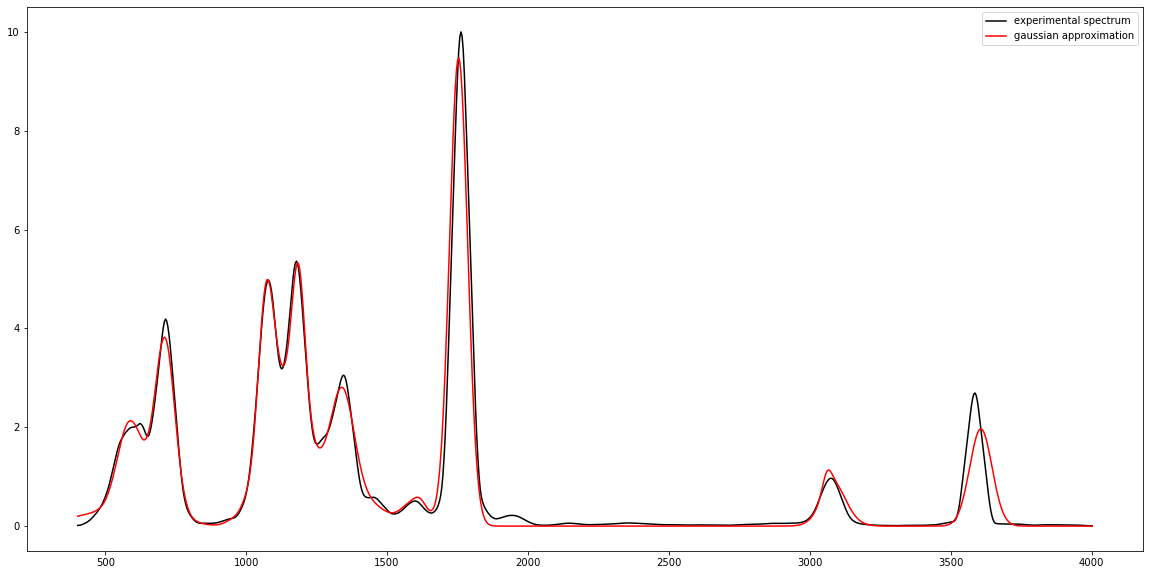

Structure(s) 2_benzoyl_benzoic_acid have been successfully loaded!
Structure(s) 2_benzoyl_benzoic_acid have been successfully loaded!


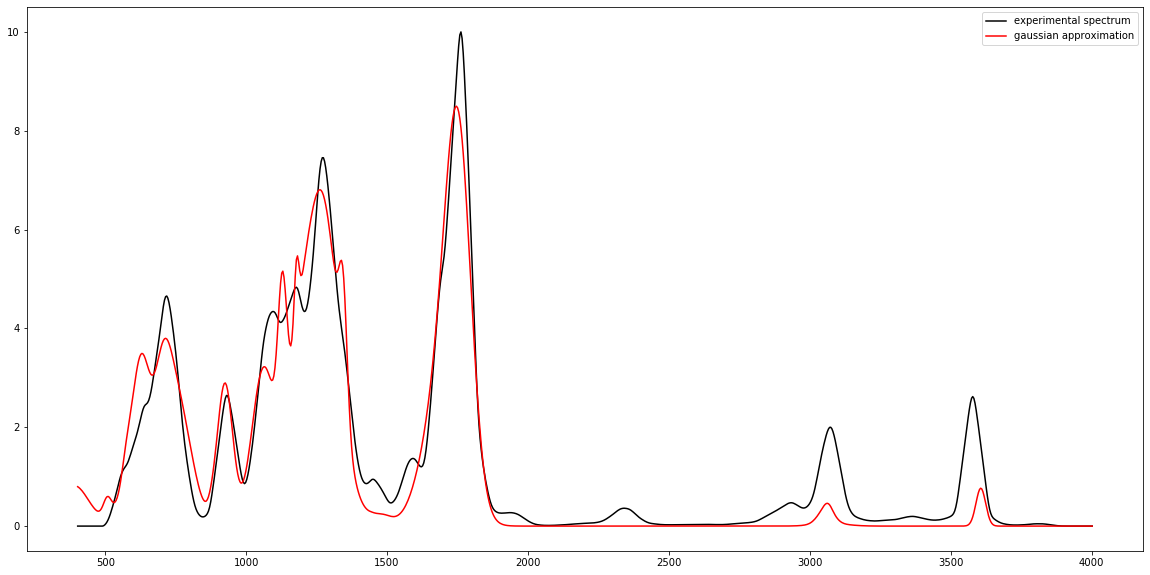

In [135]:
structures = ['3_hydroxy_benzoic_acid', 'quinone', 'benzil', 'benzoic_acid', '2_benzoyl_benzoic_acid']
k_norm = 30.4242

# structures = ['quinone', 'benzoic_acid']

X_frames = []
y = []
sigmas = []
intencities = []
names = []
freqs = []
for structure in structures:
    X_frames.append(generate_column_sum_veda_matrix(load_structures([structure])[structure]))  
    sf, fg = find_intencity_sf(structure, tol=1e-20, sigma=10, max_iter=None, all_freqs=True)
    
    for i in range(sf.shape[0]):
        if structure == '2_benzoyl_benzoic_acid':
            y.append(k_norm * sf.sf[i])
        else:
            y.append(sf.sf[i])
        sigmas.append(sf.sigma[i])
        intencities.append(sf.intencity[i])
        names.append(structure)
        freqs.append(sf.peak_position[i])

In [136]:
X = pd.concat(X_frames, ignore_index=True)
X.shape
data = X[:]
data['sf'] = y
data['sigma'] = sigmas
data['intensity'] = intencities
data['structure'] = names
data['freq'] = freqs

In [137]:
data.to_csv('data_for_intetcity_scaling.csv', index=False)

In [297]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
load_structures(["2_benzoyl_benzoic_acid"])["2_benzoyl_benzoic_acid"].veda_matrix[10:12]

Structure(s) 2_benzoyl_benzoic_acid have been successfully loaded!


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,freq
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1791.52
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1737.75


In [292]:
raw_data = pd.read_csv('data_for_intetcity_scaling.csv')
raw_data.fillna(0, inplace=True)
raw_data = raw_data[(raw_data.sf != float('inf')) & ((raw_data.freq > 3300) | (raw_data.freq < 2700)) & (raw_data.intensity > 5)]
X = raw_data.drop(['sf', 'sigma', 'intensity'], axis=1)
X = X.loc[:, (X != 0).any(axis=0)]
non_abs_columns = [col for col in X.columns if (col.find('_abs') != -1) or (col in ('freq', 'structure'))]
X = X[non_abs_columns]
X

,CCCC_abs,CCC_abs,CC_abs,HCCC_abs,HCC_abs,HOCC_abs,HOC_abs,OCCC_abs,OCC_abs,OCOC_abs,OCO_abs,OC_abs,OH_abs,structure,freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,3_hydroxy_benzoic_acid,3663.452804
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,3_hydroxy_benzoic_acid,3607.990622
6,0.0,2.0,5.0,0.0,0.0,0.0,6.0,0.0,3.0,0.0,1.0,84.0,0.0,3_hydroxy_benzoic_acid,1749.241414
7,0.0,33.0,53.0,0.0,13.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3_hydroxy_benzoic_acid,1617.152462
8,0.0,22.0,57.0,0.0,12.0,0.0,3.0,0.0,3.0,0.0,0.0,2.0,0.0,3_hydroxy_benzoic_acid,1610.202988
10,0.0,33.0,25.0,0.0,28.0,0.0,4.0,0.0,3.0,0.0,1.0,6.0,0.0,3_hydroxy_benzoic_acid,1456.746849
11,0.0,7.0,72.0,0.0,7.0,0.0,10.0,0.0,1.0,0.0,2.0,2.0,0.0,3_hydroxy_benzoic_acid,1348.706994
12,0.0,7.0,32.0,0.0,5.0,0.0,22.0,0.0,1.0,0.0,8.0,23.0,0.0,3_hydroxy_benzoic_acid,1345.535684
14,0.0,13.0,12.0,0.0,27.0,0.0,8.0,0.0,0.0,0.0,2.0,36.0,0.0,3_hydroxy_benzoic_acid,1256.729233
15,0.0,1.0,22.0,0.0,40.0,0.0,29.0,0.0,0.0,0.0,0.0,8.0,0.0,3_hydroxy_benzoic_acid,1171.622642


In [243]:
class MeanModel:
    def __init__(self):
        self.mean = None
    
    def fit(self, X, y):
        self.mean = np.mean(y)
    
    def predict(self, X):
        return [self.mean for i in range(X.shape[0])]

In [244]:
def curve(y_true, y_pred, label=None):
    x = np.arange(0, 1, 0.001)
    y = [sum(abs(y_pred - y_true) < x_i) / len(y_pred) for x_i in x]
    plt.plot(x, y, label=label)
    plt.xlabel('mae')
    plt.ylabel('share')

In [254]:
raw_data.sf.mean(), raw_data.sf.std()

(0.2781653513547734, 0.3510602491218856)

### Без нормировки

In [264]:
lr = LinearRegression()
lr.fit(X, raw_data.sf)
prediction = lr.predict(X)
sum(abs(prediction - raw_data.sf) < 0.25) / len(prediction)
# print(*zip(prediction, raw_data.sf), sep='\n')

0.6105263157894737

In [279]:
X_norm = normalize(X, norm='l1')

lr.fit(X_norm, raw_data.sf)
prediction = lr.predict(X_norm)
sum(abs(prediction - raw_data.sf) < 0.25) / len(prediction)

0.5254237288135594

In [247]:
sorted(list(zip(lr.coef_, X.columns)), key=lambda x: -abs(x[0]))[:5]

[(-0.38607489966693037, 'OCC'),
 (0.332175759234395, 'CCCC'),
 (-0.3028947229978341, 'HCCC'),
 (0.25709820398475397, 'OCO'),
 (0.2269395229478962, 'HOC')]

In [248]:
sgdr = SGDRegressor(penalty='l2', max_iter=100000)
sgdr.fit(X_norm, raw_data.sf)
prediction = sgdr.predict(X_norm)
sum(abs(prediction - raw_data.sf) < 0.25) / len(prediction)

0.6421052631578947

In [249]:
sorted(list(zip(sgdr.coef_, X.columns)), key=lambda x: -abs(x[0]))[:5]

[(0.026092376151000206, 'OC'),
 (0.019685832995815538, 'HOC'),
 (-0.01831587178229083, 'OCC'),
 (0.018240563017549852, 'CC'),
 (0.015027444960334113, 'OCO')]

In [250]:
mm = MeanModel()
mm.fit(X_norm, raw_data.sf)
prediction = mm.predict(X_norm)
sum(abs(prediction - raw_data.sf) < 0.25) / len(prediction)

0.42105263157894735

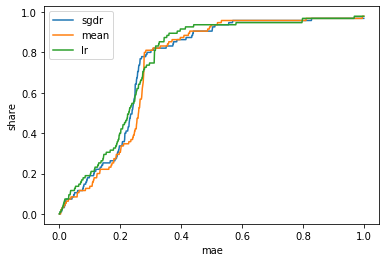

In [251]:
curve(sgdr.predict(X_norm), raw_data.sf, label='sgdr')
curve(mm.predict(X_norm), raw_data.sf, label='mean')
curve(lr.predict(X_norm), raw_data.sf, label='lr')
plt.legend()

### Квадратичная зависимость

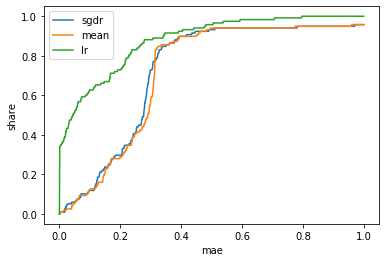

In [283]:
X_poly = PolynomialFeatures().fit_transform(X_norm)
lr = LinearRegression()
lr.fit(X_poly, raw_data.sf)
sgdr = SGDRegressor(penalty='l2', max_iter=100000)
sgdr.fit(X_poly, raw_data.sf)
mm = MeanModel()
mm.fit(X_poly, raw_data.sf)
curve(sgdr.predict(X_poly), raw_data.sf, label='sgdr')
curve(mm.predict(X_poly), raw_data.sf, label='mean')
curve(lr.predict(X_poly), raw_data.sf, label='lr')
plt.legend()

In [285]:
X_poly.shape

(118, 105)

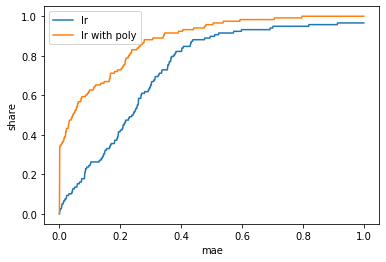

In [284]:
lr1 = LinearRegression()
lr1.fit(X_norm, raw_data.sf)

lr2 = LinearRegression()
lr2.fit(X_poly, raw_data.sf)

curve(lr1.predict(X_norm), raw_data.sf, label='lr')
curve(lr2.predict(X_poly), raw_data.sf, label='lr with poly')

plt.legend()

### Для индивидуального вещества

In [255]:
ba_data = raw_data[raw_data.structure == '2_benzoyl_benzoic_acid']
X = ba_data.drop(['sf', 'sigma', 'structure'], axis=1)
X = X.loc[:, (X != 0).any(axis=0)]
non_abs_columns = [col for col in X.columns if col.find('_abs') == -1]
X = X[non_abs_columns]
X_norm = normalize(X, norm='l1')
# X_norm = X

In [256]:
lr = LinearRegression()
lr.fit(X_norm, ba_data.sf)
sgdr = SGDRegressor(penalty='l2', max_iter=100000)
sgdr.fit(X_norm, ba_data.sf)
mm = MeanModel()
mm.fit(X_norm, ba_data.sf)
X.shape

(29, 15)

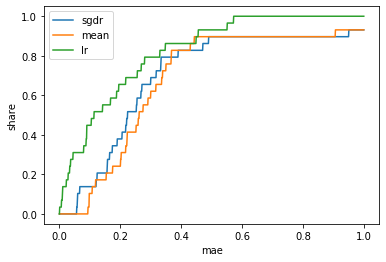

In [257]:
curve(sgdr.predict(X_norm), ba_data.sf, label='sgdr')
curve(mm.predict(X_norm), ba_data.sf, label='mean')
curve(lr.predict(X_norm), ba_data.sf, label='lr')
plt.legend()